In [628]:
import pandas as pd

data = pd.read_csv(r"D:\Downloads\NewDataSet.csv")
data.head()

,Latitude,Longitude,Product Nr,Actual Delivery Time
0,52.263007,7.005476,5.119010e+12,4
1,51.592293,5.316224,7.187600e+12,7
2,51.594927,4.546363,1.113020e+12,1
3,51.356960,5.311556,2.130740e+12,2
4,51.589600,4.777170,2.136330e+12,17


In [629]:
data.describe()

,Latitude,Longitude,Product Nr,Actual Delivery Time
count,20005.000000,20005.000000,2.000500e+04,20005.000000
mean,52.122797,5.584748,4.637958e+12,3.748063
std,0.564288,0.864061,2.280047e+12,4.489296
min,50.770793,3.387919,1.100030e+12,1.000000
25%,51.641167,4.951427,2.197900e+12,2.000000
50%,52.092734,5.668272,4.199100e+12,3.000000
75%,52.523599,6.257708,6.194950e+12,4.000000
max,53.478596,7.145816,8.200000e+12,50.000000


In [630]:
x = data[['Product Nr','Latitude','Longitude']].values


y = data['Actual Delivery Time'].values

names = ['Product Nr','Latitude','Longitude']

In [631]:
import numpy
from sklearn.model_selection import train_test_split

numpy.random.seed(1000)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=1)
x_p = x_test[:,0:1] * x_test[:,1:2]
#x_p.sort(axis=1)
print(x_p)

[[2.69989157e+14]
 [2.18596579e+14]
 [4.19557988e+14]
 ...
 [4.17937019e+14]
 [2.68277754e+14]
 [4.20488685e+14]]


In [632]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [633]:
y_pred = regressor.predict(x_test)

In [634]:
regressor.score(x_test, y_test)

-0.0007712555701671063

In [635]:
print(regressor.coef_)

[ 2.53753240e-15  6.16548477e-02 -8.44770773e-02]


In [636]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures


poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x_train)
X_t_poly = poly_reg.fit_transform(x_test)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)
polynom = pol_reg.predict(poly_reg.fit_transform(x_test))

5002
5002
mean_absolute_error: 2.4604015741518914
mean_squared_error: 20.169757293887347
r2_score: -0.0008304231483589053


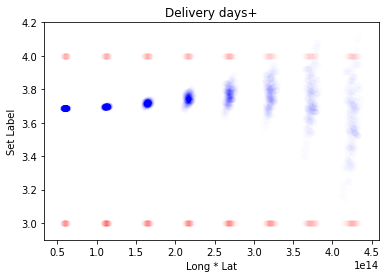

In [637]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import call

print(len(x_p))
print(len(y_test))
print("mean_absolute_error: " + str(mean_absolute_error(y_test, polynom)))
print("mean_squared_error: " + str(mean_squared_error(y_test, polynom)))
print("r2_score: " + str(r2_score(y_test, polynom)))
plt.scatter(x_p, y_test, color='red', alpha=0.005)
plt.scatter(x_p, polynom, color='blue', alpha=0.005)
plt.ylim(2.9, 4.2)
plt.title("Delivery days+")
plt.xlabel("Long * Lat")
plt.ylabel("Set Label")
plt.show()